In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import statistics
from sklearn.datasets import make_multilabel_classification

In [2]:
# Load in the data
dataset_1= np.load('KKL366_220124_deconvolved_data.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
dataset_2= np.load('KKL366_220124_dff-denoised_data.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
dataset_3= np.load('KKL366_220125_deconvolved_data.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
dataset_4= np.load('KKL366_220125_dff-denoised_data.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
dataset_5= np.load('KKL366_220126_deconvolved_data.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
dataset_6= np.load('KKL366_220126_dff-denoised_data.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

In [3]:
labels_1= np.load('KKL366_220124_deconvolved_labels.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
labels_2= np.load('KKL366_220124_dff-denoised_labels.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
labels_3= np.load('KKL366_220125_deconvolved_labels.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
labels_4= np.load('KKL366_220125_dff-denoised_labels.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
labels_5= np.load('KKL366_220126_deconvolved_labels.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
labels_6= np.load('KKL366_220126_dff-denoised_labels.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

In [4]:
dataset_1_train, dataset_1_test, labels_1_train, labels_1_test = train_test_split(dataset_1, labels_1, test_size=0.2, random_state=50)
dataset_2_train, dataset_2_test, labels_2_train, labels_2_test = train_test_split(dataset_2, labels_2, test_size=0.2, random_state=50)
dataset_3_train, dataset_3_test, labels_3_train, labels_3_test = train_test_split(dataset_3, labels_3, test_size=0.2, random_state=50)
dataset_4_train, dataset_4_test, labels_4_train, labels_4_test = train_test_split(dataset_4, labels_4, test_size=0.2, random_state=50)
dataset_5_train, dataset_5_test, labels_5_train, labels_5_test = train_test_split(dataset_5, labels_5, test_size=0.2, random_state=50)
dataset_6_train, dataset_6_test, labels_6_train, labels_6_test = train_test_split(dataset_6, labels_6, test_size=0.2, random_state=50)

# AdaBoost implementation using fixed hyperparameters

In [5]:
model_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model_4 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model_5 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model_6 = DecisionTreeClassifier(criterion='entropy', max_depth=1)

AdaBoost_1 = AdaBoostClassifier(base_estimator=model_1, n_estimators=500, learning_rate=1)
AdaBoost_2 = AdaBoostClassifier(base_estimator=model_2, n_estimators=500, learning_rate=1)
AdaBoost_3 = AdaBoostClassifier(base_estimator=model_3, n_estimators=500, learning_rate=1)
AdaBoost_4 = AdaBoostClassifier(base_estimator=model_4, n_estimators=500, learning_rate=1)
AdaBoost_5 = AdaBoostClassifier(base_estimator=model_5, n_estimators=500, learning_rate=1)
AdaBoost_6 = AdaBoostClassifier(base_estimator=model_6, n_estimators=500, learning_rate=1)

In [6]:
dataset_1_train_reduced=np.max(dataset_1_train, axis=2)
dataset_1_test_reduced=np.max(dataset_1_test, axis=2)

dataset_2_train_reduced=np.max(dataset_2_train, axis=2)
dataset_2_test_reduced=np.max(dataset_2_test, axis=2)

dataset_3_train_reduced=np.max(dataset_3_train, axis=2)
dataset_3_test_reduced=np.max(dataset_3_test, axis=2)

dataset_4_train_reduced=np.max(dataset_4_train, axis=2)
dataset_4_test_reduced=np.max(dataset_4_test, axis=2)

dataset_5_train_reduced=np.max(dataset_5_train, axis=2)
dataset_5_test_reduced=np.max(dataset_5_test, axis=2)

dataset_6_train_reduced=np.max(dataset_6_train, axis=2)
dataset_6_test_reduced=np.max(dataset_6_test, axis=2)

In [7]:
#Fit the model with training data
boostmodel_1 = AdaBoost_1.fit(dataset_1_train_reduced, labels_1_train)
boostmodel_2 = AdaBoost_2.fit(dataset_2_train_reduced, labels_2_train)
boostmodel_3 = AdaBoost_3.fit(dataset_3_train_reduced, labels_3_train)
boostmodel_4 = AdaBoost_4.fit(dataset_4_train_reduced, labels_4_train)
boostmodel_5 = AdaBoost_5.fit(dataset_5_train_reduced, labels_5_train)
boostmodel_6 = AdaBoost_6.fit(dataset_6_train_reduced, labels_6_train)

In [8]:
#Evaluate the accuracy of the model
labels_1_pred = boostmodel_1.predict(dataset_1_test_reduced)
predictions_1 = metrics.accuracy_score(labels_1_test, labels_1_pred)

labels_2_pred = boostmodel_2.predict(dataset_2_test_reduced)
predictions_2 = metrics.accuracy_score(labels_2_test, labels_2_pred)

labels_3_pred = boostmodel_3.predict(dataset_3_test_reduced)
predictions_3 = metrics.accuracy_score(labels_3_test, labels_3_pred)

labels_4_pred = boostmodel_4.predict(dataset_4_test_reduced)
predictions_4 = metrics.accuracy_score(labels_4_test, labels_4_pred)

labels_5_pred = boostmodel_5.predict(dataset_5_test_reduced)
predictions_5 = metrics.accuracy_score(labels_5_test, labels_5_pred)

labels_6_pred = boostmodel_6.predict(dataset_6_test_reduced)
predictions_6 = metrics.accuracy_score(labels_6_test, labels_6_pred)


In [9]:
#Calculating the accuracy in percentage
print('The accuracy for session 220124_deconvolved data is: ', predictions_1 * 100, '%')
print('The accuracy for session 220124_dff_denoised data is: ', predictions_2 * 100, '%')
print('The accuracy for session 220125_deconvolved data is: ', predictions_3 * 100, '%')
print('The accuracy for session 220125_dff_denoised data is: ', predictions_4 * 100, '%')
print('The accuracy for session 220126_deconvolved data is: ', predictions_5 * 100, '%')
print('The accuracy for session 220126_dff_denoised data is: ', predictions_6 * 100, '%')

The accuracy for session 220124_deconvolved data is:  98.9795918367347 %
The accuracy for session 220124_dff_denoised data is:  95.578231292517 %
The accuracy for session 220125_deconvolved data is:  92.85714285714286 %
The accuracy for session 220125_dff_denoised data is:  98.80952380952381 %
The accuracy for session 220126_deconvolved data is:  99.65986394557824 %
The accuracy for session 220126_dff_denoised data is:  89.28571428571429 %


# Hyperparameters optimization using fixed learning_rate

In [10]:
#1_dataset
model_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_1_train_reduced=np.max(dataset_1_train, axis=2)
dataset_1_test_reduced=np.max(dataset_1_test, axis=2)
Acc_score_1=[]
#2_dataset
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_2_train_reduced=np.max(dataset_2_train, axis=2)
dataset_2_test_reduced=np.max(dataset_2_test, axis=2)
Acc_score_2=[]
#3_dataset
model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_3_train_reduced=np.max(dataset_3_train, axis=2)
dataset_3_test_reduced=np.max(dataset_3_test, axis=2)
Acc_score_3=[]
#4_dataset
model_4 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_4_train_reduced=np.max(dataset_4_train, axis=2)
dataset_4_test_reduced=np.max(dataset_4_test, axis=2)
Acc_score_4=[]
#5_dataset
model_5 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_5_train_reduced=np.max(dataset_5_train, axis=2)
dataset_5_test_reduced=np.max(dataset_5_test, axis=2)
Acc_score_5=[]
#6_dataset
model_6 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_6_train_reduced=np.max(dataset_6_train, axis=2)
dataset_6_test_reduced=np.max(dataset_6_test, axis=2)
Acc_score_6=[]
#n_estimators tradeoff
for i in range(1, 1000, 10):
    AdaBoost_1 = AdaBoostClassifier(base_estimator=model_1, n_estimators=i, learning_rate=1)
    boostmodel_1 = AdaBoost_1.fit(dataset_1_train_reduced, labels_1_train)
    labels_1_pred = boostmodel_1.predict(dataset_1_test_reduced)
    predictions_1 = metrics.accuracy_score(labels_1_test, labels_1_pred)
    Acc_score_1.append(predictions_1*100)
    
    AdaBoost_2 = AdaBoostClassifier(base_estimator=model_2, n_estimators=i, learning_rate=1)
    boostmodel_2 = AdaBoost_2.fit(dataset_2_train_reduced, labels_2_train)
    labels_2_pred = boostmodel_2.predict(dataset_2_test_reduced)
    predictions_2 = metrics.accuracy_score(labels_2_test, labels_2_pred)
    Acc_score_2.append(predictions_2*100)
    
    AdaBoost_3 = AdaBoostClassifier(base_estimator=model_3, n_estimators=i, learning_rate=1)
    boostmodel_3 = AdaBoost_3.fit(dataset_3_train_reduced, labels_3_train)
    labels_3_pred = boostmodel_3.predict(dataset_3_test_reduced)
    predictions_3 = metrics.accuracy_score(labels_3_test, labels_3_pred)
    Acc_score_3.append(predictions_3*100)
    
    AdaBoost_4 = AdaBoostClassifier(base_estimator=model_4, n_estimators=i, learning_rate=1)
    boostmodel_4 = AdaBoost_4.fit(dataset_4_train_reduced, labels_4_train)
    labels_4_pred = boostmodel_4.predict(dataset_4_test_reduced)
    predictions_4 = metrics.accuracy_score(labels_4_test, labels_4_pred)
    Acc_score_4.append(predictions_4*100)
    
    AdaBoost_5 = AdaBoostClassifier(base_estimator=model_5, n_estimators=i, learning_rate=1)
    boostmodel_5 = AdaBoost_5.fit(dataset_5_train_reduced, labels_5_train)
    labels_5_pred = boostmodel_5.predict(dataset_5_test_reduced)
    predictions_5 = metrics.accuracy_score(labels_5_test, labels_5_pred)
    Acc_score_5.append(predictions_5*100)
    
    AdaBoost_6 = AdaBoostClassifier(base_estimator=model_6, n_estimators=i, learning_rate=1)
    boostmodel_6 = AdaBoost_6.fit(dataset_6_train_reduced, labels_6_train)
    labels_6_pred = boostmodel_6.predict(dataset_6_test_reduced)
    predictions_6 = metrics.accuracy_score(labels_6_test, labels_6_pred)
    Acc_score_6.append(predictions_6*100)
print(Acc_score_1)
print(Acc_score_2)
print(Acc_score_3)
print(Acc_score_4)
print(Acc_score_5)
print(Acc_score_6)

[86.90476190476191, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.9795918367347, 98.97959

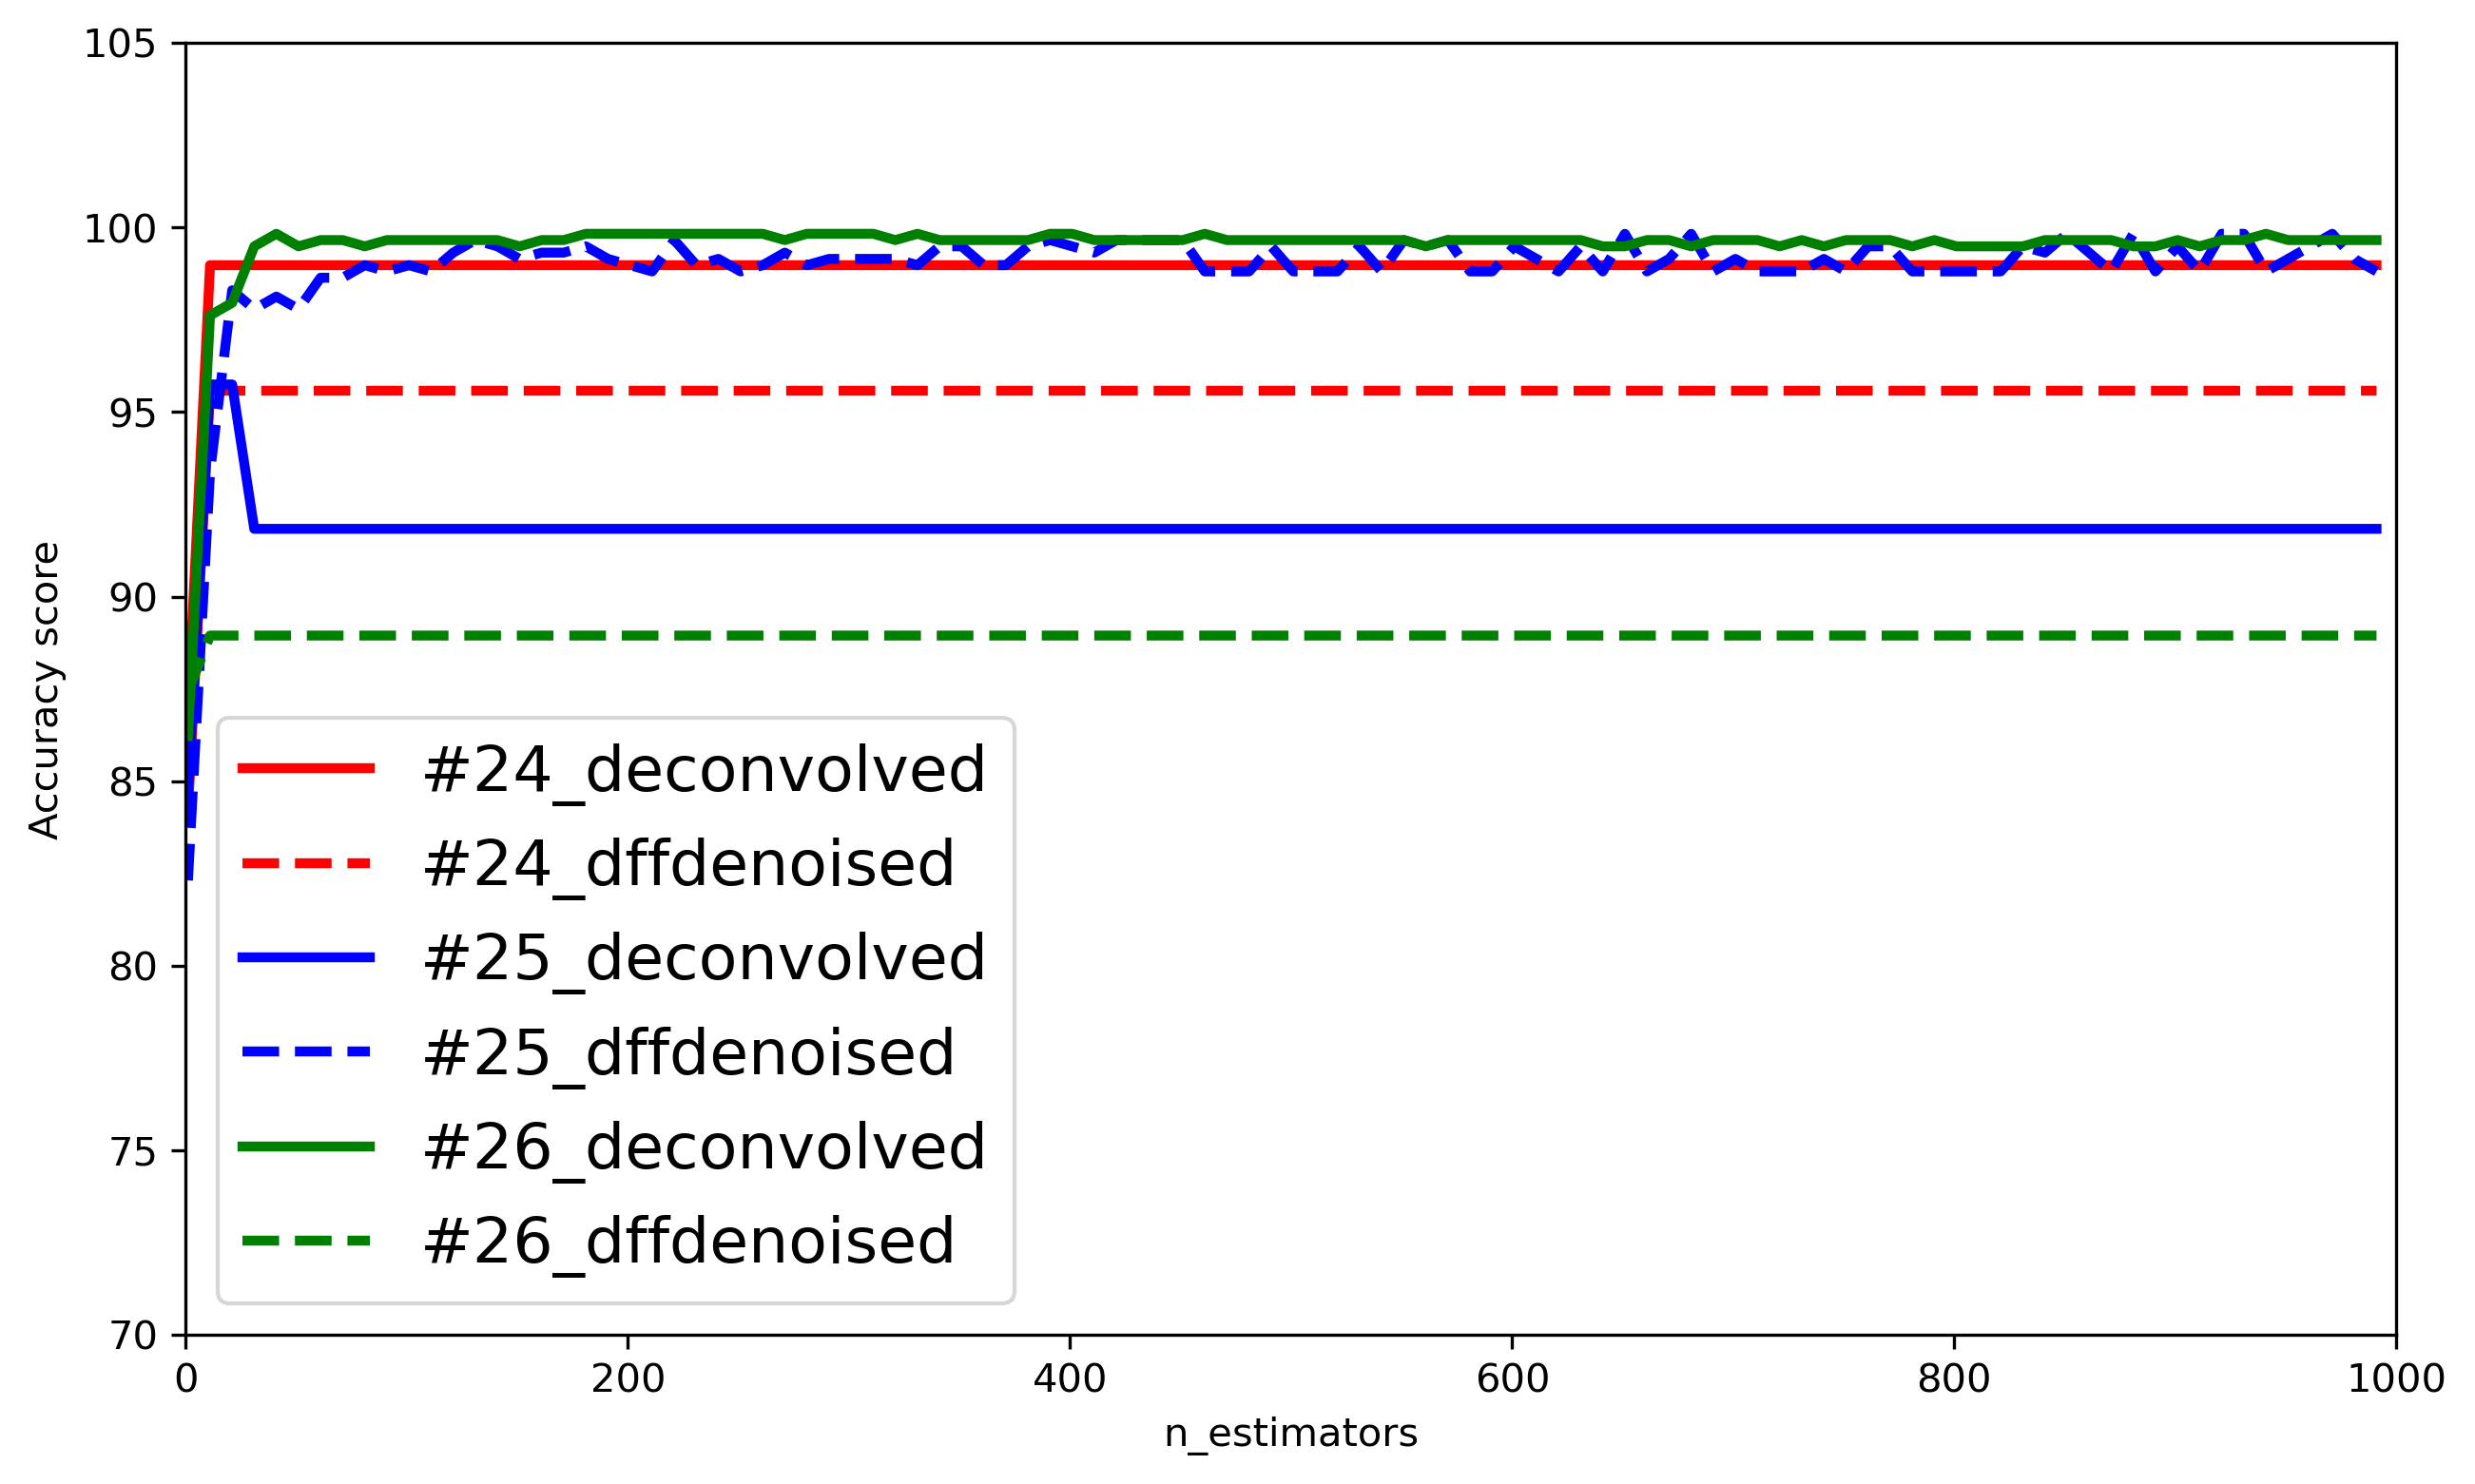

In [19]:
#figure_for_n_estimators_optimization
import matplotlib.pyplot as plt
n_est_arr=[]
for i in range(1, 1000, 10):
    n_est=i
    n_est_arr.append(n_est)


fig = plt.figure(figsize=(10, 6), dpi=300)
plt.xlim([0, 1000])
plt.ylim([70, 105])
plt.plot(n_est_arr, Acc_score_1, color="red",  linewidth=2.5, linestyle="-", label="#24_deconvolved")
plt.plot(n_est_arr, Acc_score_2, color="red",  linewidth=2.5, linestyle="--", label="#24_dffdenoised")
plt.plot(n_est_arr, Acc_score_3, color="blue",  linewidth=2.5, linestyle="-", label="#25_deconvolved")
plt.plot(n_est_arr, Acc_score_4, color="blue",  linewidth=2.5, linestyle="--", label="#25_dffdenoised")
plt.plot(n_est_arr, Acc_score_5, color="green",  linewidth=2.5, linestyle="-", label="#26_deconvolved")
plt.plot(n_est_arr, Acc_score_6, color="green",  linewidth=2.5, linestyle="--", label="#26_dffdenoised")
plt.legend(loc='best', prop={'size': 16}, frameon=True)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy score")
plt.show()

# Check if Acc-score stabilizes when using n_estimators >> 1000

In [14]:
model_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_1_train_reduced=np.max(dataset_1_train, axis=2)
dataset_1_test_reduced=np.max(dataset_1_test, axis=2)
AdaBoost_1 = AdaBoostClassifier(base_estimator=model_1, n_estimators=10000, learning_rate=1)
boostmodel_1 = AdaBoost_1.fit(dataset_1_train_reduced, labels_1_train)
labels_1_pred = boostmodel_1.predict(dataset_1_test_reduced)
predictions_1 = metrics.accuracy_score(labels_1_test, labels_1_pred)
print('The accuracy for session 220124_deconvolved data is: ', predictions_1 * 100, '%')

model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_2_train_reduced=np.max(dataset_2_train, axis=2)
dataset_2_test_reduced=np.max(dataset_2_test, axis=2)
AdaBoost_2 = AdaBoostClassifier(base_estimator=model_2, n_estimators=10000, learning_rate=1)
boostmodel_2 = AdaBoost_2.fit(dataset_2_train_reduced, labels_2_train)
labels_2_pred = boostmodel_2.predict(dataset_2_test_reduced)
predictions_2 = metrics.accuracy_score(labels_2_test, labels_2_pred)
print('The accuracy for session 220124_dff_denoised data is: ', predictions_2 * 100, '%')

model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_3_train_reduced=np.max(dataset_3_train, axis=2)
dataset_3_test_reduced=np.max(dataset_3_test, axis=2)
AdaBoost_3 = AdaBoostClassifier(base_estimator=model_3, n_estimators=10000, learning_rate=1)
boostmodel_3 = AdaBoost_3.fit(dataset_3_train_reduced, labels_3_train)
labels_3_pred = boostmodel_3.predict(dataset_3_test_reduced)
predictions_3 = metrics.accuracy_score(labels_3_test, labels_3_pred)
print('The accuracy for session 220125_deconvolved data is: ', predictions_3 * 100, '%')

model_4 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_4_train_reduced=np.max(dataset_4_train, axis=2)
dataset_4_test_reduced=np.max(dataset_4_test, axis=2)
AdaBoost_4 = AdaBoostClassifier(base_estimator=model_4, n_estimators=10000, learning_rate=1)
boostmodel_4 = AdaBoost_4.fit(dataset_4_train_reduced, labels_4_train)
labels_4_pred = boostmodel_4.predict(dataset_4_test_reduced)
predictions_4 = metrics.accuracy_score(labels_4_test, labels_4_pred)
print('The accuracy for session 220125_dff_denoised data is: ', predictions_4 * 100, '%')

model_5 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_5_train_reduced=np.max(dataset_5_train, axis=2)
dataset_5_test_reduced=np.max(dataset_5_test, axis=2)
AdaBoost_5 = AdaBoostClassifier(base_estimator=model_5, n_estimators=10000, learning_rate=1)
boostmodel_5 = AdaBoost_5.fit(dataset_5_train_reduced, labels_5_train)
labels_5_pred = boostmodel_5.predict(dataset_5_test_reduced)
predictions_5 = metrics.accuracy_score(labels_5_test, labels_5_pred)
print('The accuracy for session 220126_deconvolved data is: ', predictions_5 * 100, '%')

model_6 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_6_train_reduced=np.max(dataset_6_train, axis=2)
dataset_6_test_reduced=np.max(dataset_6_test, axis=2)
AdaBoost_6 = AdaBoostClassifier(base_estimator=model_6, n_estimators=10000, learning_rate=1)
boostmodel_6 = AdaBoost_6.fit(dataset_6_train_reduced, labels_6_train)
labels_6_pred = boostmodel_6.predict(dataset_6_test_reduced)
predictions_6 = metrics.accuracy_score(labels_6_test, labels_6_pred)
print('The accuracy for session 220126_dff_denoised data is: ', predictions_6 * 100, '%')

The accuracy for session 220124_deconvolved data is:  98.9795918367347 %
The accuracy for session 220124_dff_denoised data is:  95.578231292517 %
The accuracy for session 220125_deconvolved data is:  92.85714285714286 %
The accuracy for session 220125_dff_denoised data is:  99.14965986394559 %
The accuracy for session 220126_deconvolved data is:  98.80952380952381 %
The accuracy for session 220126_dff_denoised data is:  89.28571428571429 %


# Main optimization (n_estimators, learninig_rate tradeoff)

In [17]:
N = [*range(1, 10), *range(10, 100, 10)]
R = [0.0001, 0.001, 0.01, 0.1, 1, 10]
#1_dataset
model_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_1_train_reduced=np.max(dataset_1_train, axis=2)
dataset_1_test_reduced=np.max(dataset_1_test, axis=2)
Acc_score_11=[]
#2_dataset
model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_2_train_reduced=np.max(dataset_2_train, axis=2)
dataset_2_test_reduced=np.max(dataset_2_test, axis=2)
Acc_score_22=[]
#3_dataset
model_3 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_3_train_reduced=np.max(dataset_3_train, axis=2)
dataset_3_test_reduced=np.max(dataset_3_test, axis=2)
Acc_score_33=[]
#4_dataset
model_4 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_4_train_reduced=np.max(dataset_4_train, axis=2)
dataset_4_test_reduced=np.max(dataset_4_test, axis=2)
Acc_score_44=[]
#5_dataset
model_5 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_5_train_reduced=np.max(dataset_5_train, axis=2)
dataset_5_test_reduced=np.max(dataset_5_test, axis=2)
Acc_score_55=[]
#6_dataset
model_6 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
dataset_6_train_reduced=np.max(dataset_6_train, axis=2)
dataset_6_test_reduced=np.max(dataset_6_test, axis=2)
Acc_score_66=[]
#n_estimators,learning_rate tradeoff
for j in R:
    for k in N:
        AdaBoost_1 = AdaBoostClassifier(base_estimator=model_1, n_estimators=k, learning_rate=j)
        boostmodel_1 = AdaBoost_1.fit(dataset_1_train_reduced, labels_1_train)
        labels_1_pred = boostmodel_1.predict(dataset_1_test_reduced)
        predictions_1 = metrics.accuracy_score(labels_1_test, labels_1_pred)
        Acc_score_11.append(predictions_1*100)
        
        AdaBoost_2 = AdaBoostClassifier(base_estimator=model_2, n_estimators=k, learning_rate=j)
        boostmodel_2 = AdaBoost_2.fit(dataset_2_train_reduced, labels_2_train)
        labels_2_pred = boostmodel_2.predict(dataset_2_test_reduced)
        predictions_2 = metrics.accuracy_score(labels_2_test, labels_2_pred)
        Acc_score_22.append(predictions_2*100)
        
        AdaBoost_3 = AdaBoostClassifier(base_estimator=model_3, n_estimators=k, learning_rate=j)
        boostmodel_3 = AdaBoost_3.fit(dataset_3_train_reduced, labels_3_train)
        labels_3_pred = boostmodel_3.predict(dataset_3_test_reduced)
        predictions_3 = metrics.accuracy_score(labels_3_test, labels_3_pred)
        Acc_score_33.append(predictions_3*100)
        
        AdaBoost_4 = AdaBoostClassifier(base_estimator=model_4, n_estimators=k, learning_rate=j)
        boostmodel_4 = AdaBoost_4.fit(dataset_4_train_reduced, labels_4_train)
        labels_4_pred = boostmodel_4.predict(dataset_4_test_reduced)
        predictions_4 = metrics.accuracy_score(labels_4_test, labels_4_pred)
        Acc_score_44.append(predictions_4*100)
        
        AdaBoost_5 = AdaBoostClassifier(base_estimator=model_5, n_estimators=k, learning_rate=j)
        boostmodel_5 = AdaBoost_5.fit(dataset_5_train_reduced, labels_5_train)
        labels_5_pred = boostmodel_5.predict(dataset_5_test_reduced)
        predictions_5 = metrics.accuracy_score(labels_5_test, labels_5_pred)
        Acc_score_55.append(predictions_5*100)
        
        AdaBoost_6 = AdaBoostClassifier(base_estimator=model_6, n_estimators=k, learning_rate=j)
        boostmodel_6 = AdaBoost_6.fit(dataset_6_train_reduced, labels_6_train)
        labels_6_pred = boostmodel_6.predict(dataset_6_test_reduced)
        predictions_6 = metrics.accuracy_score(labels_6_test, labels_6_pred)
        Acc_score_66.append(predictions_6*100)


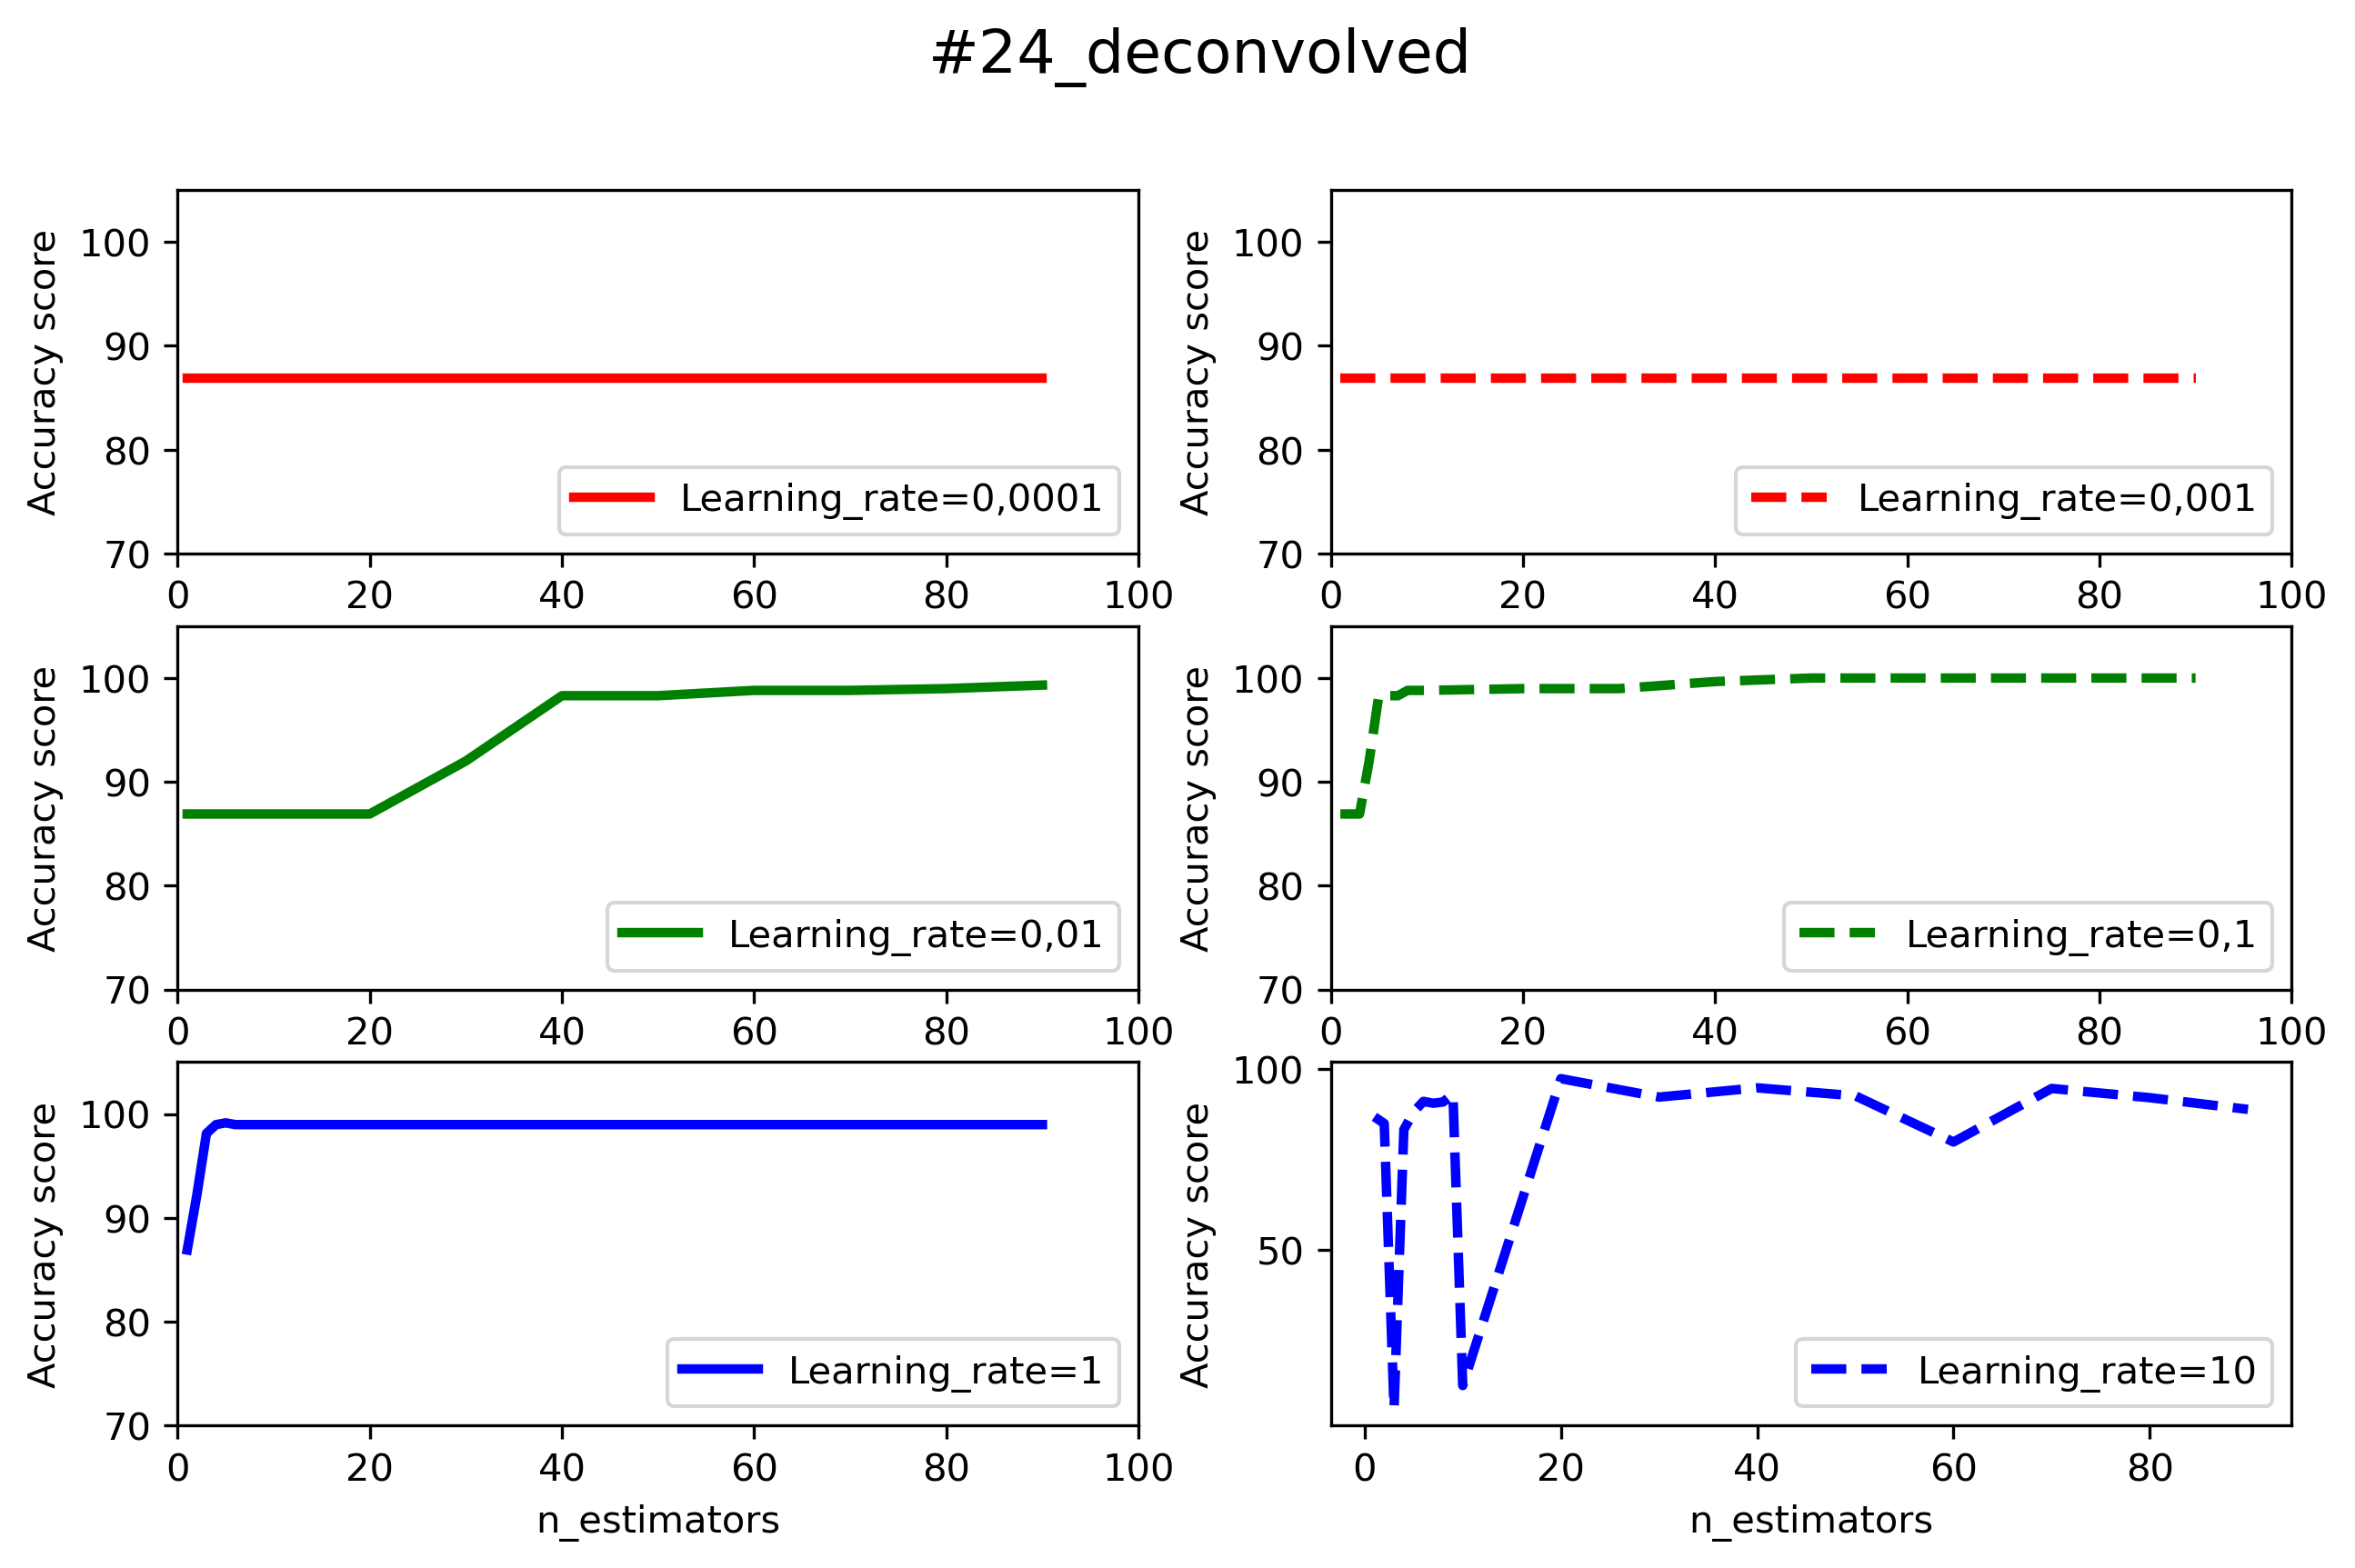

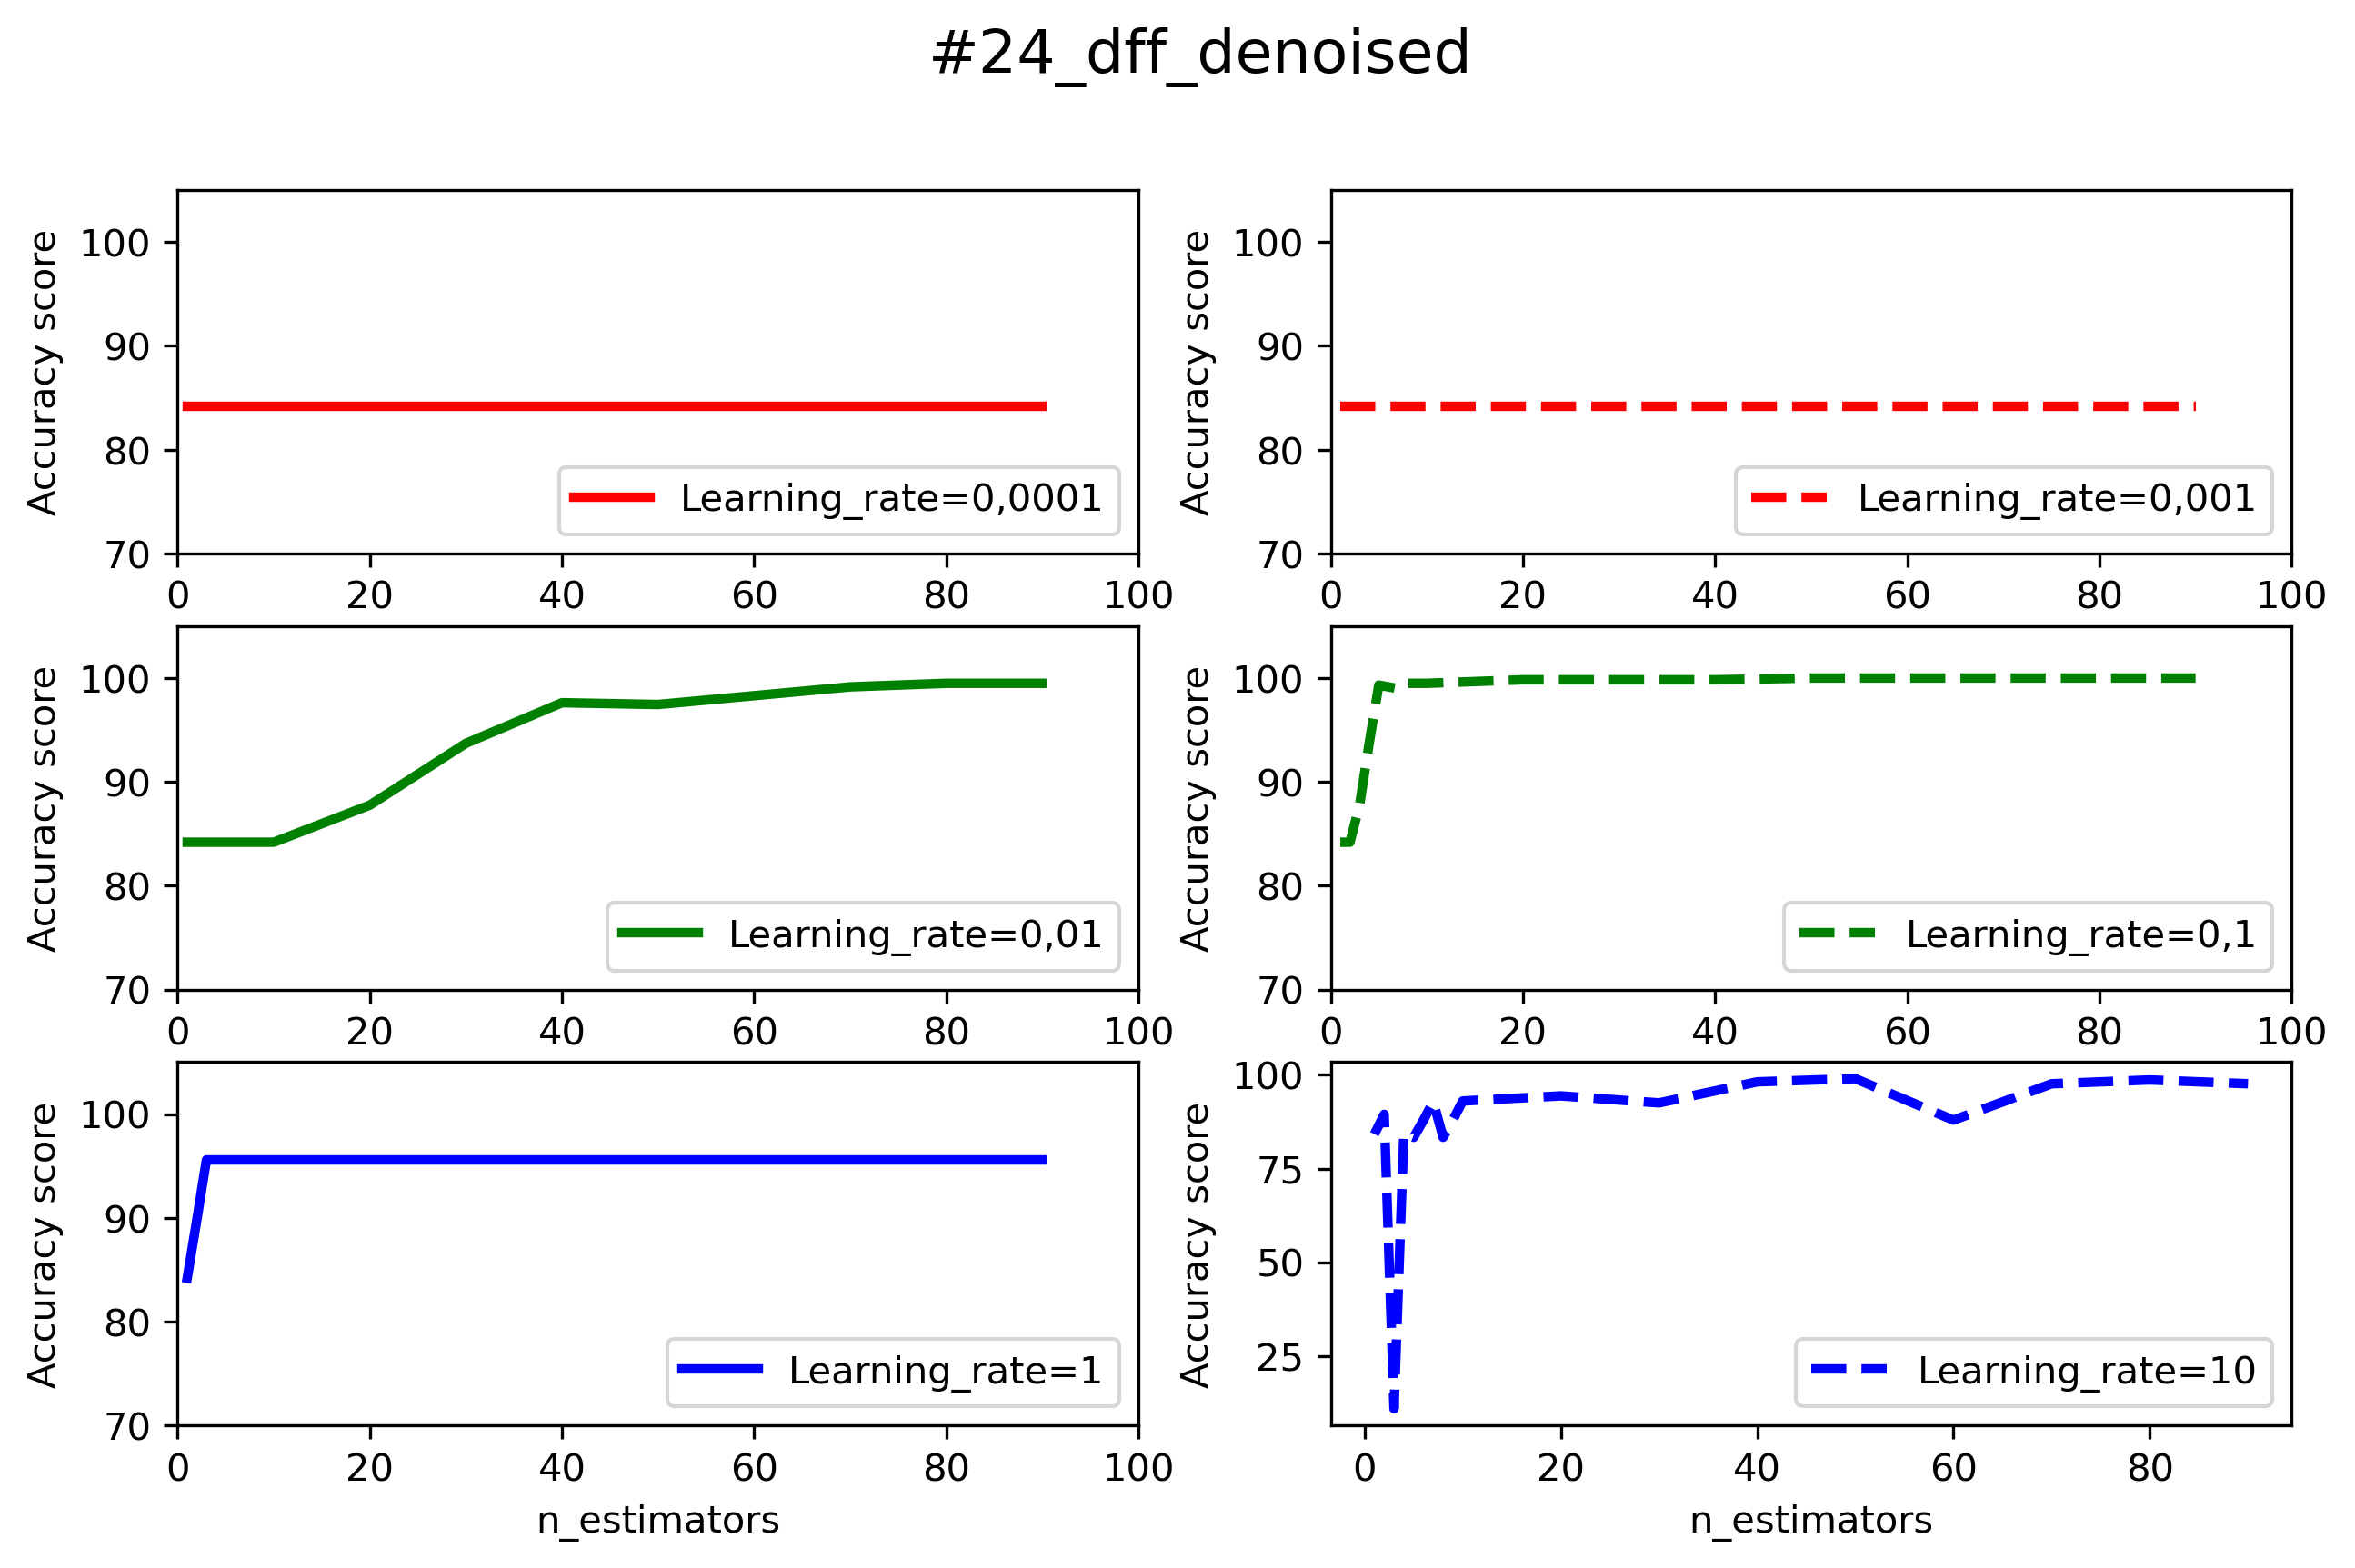

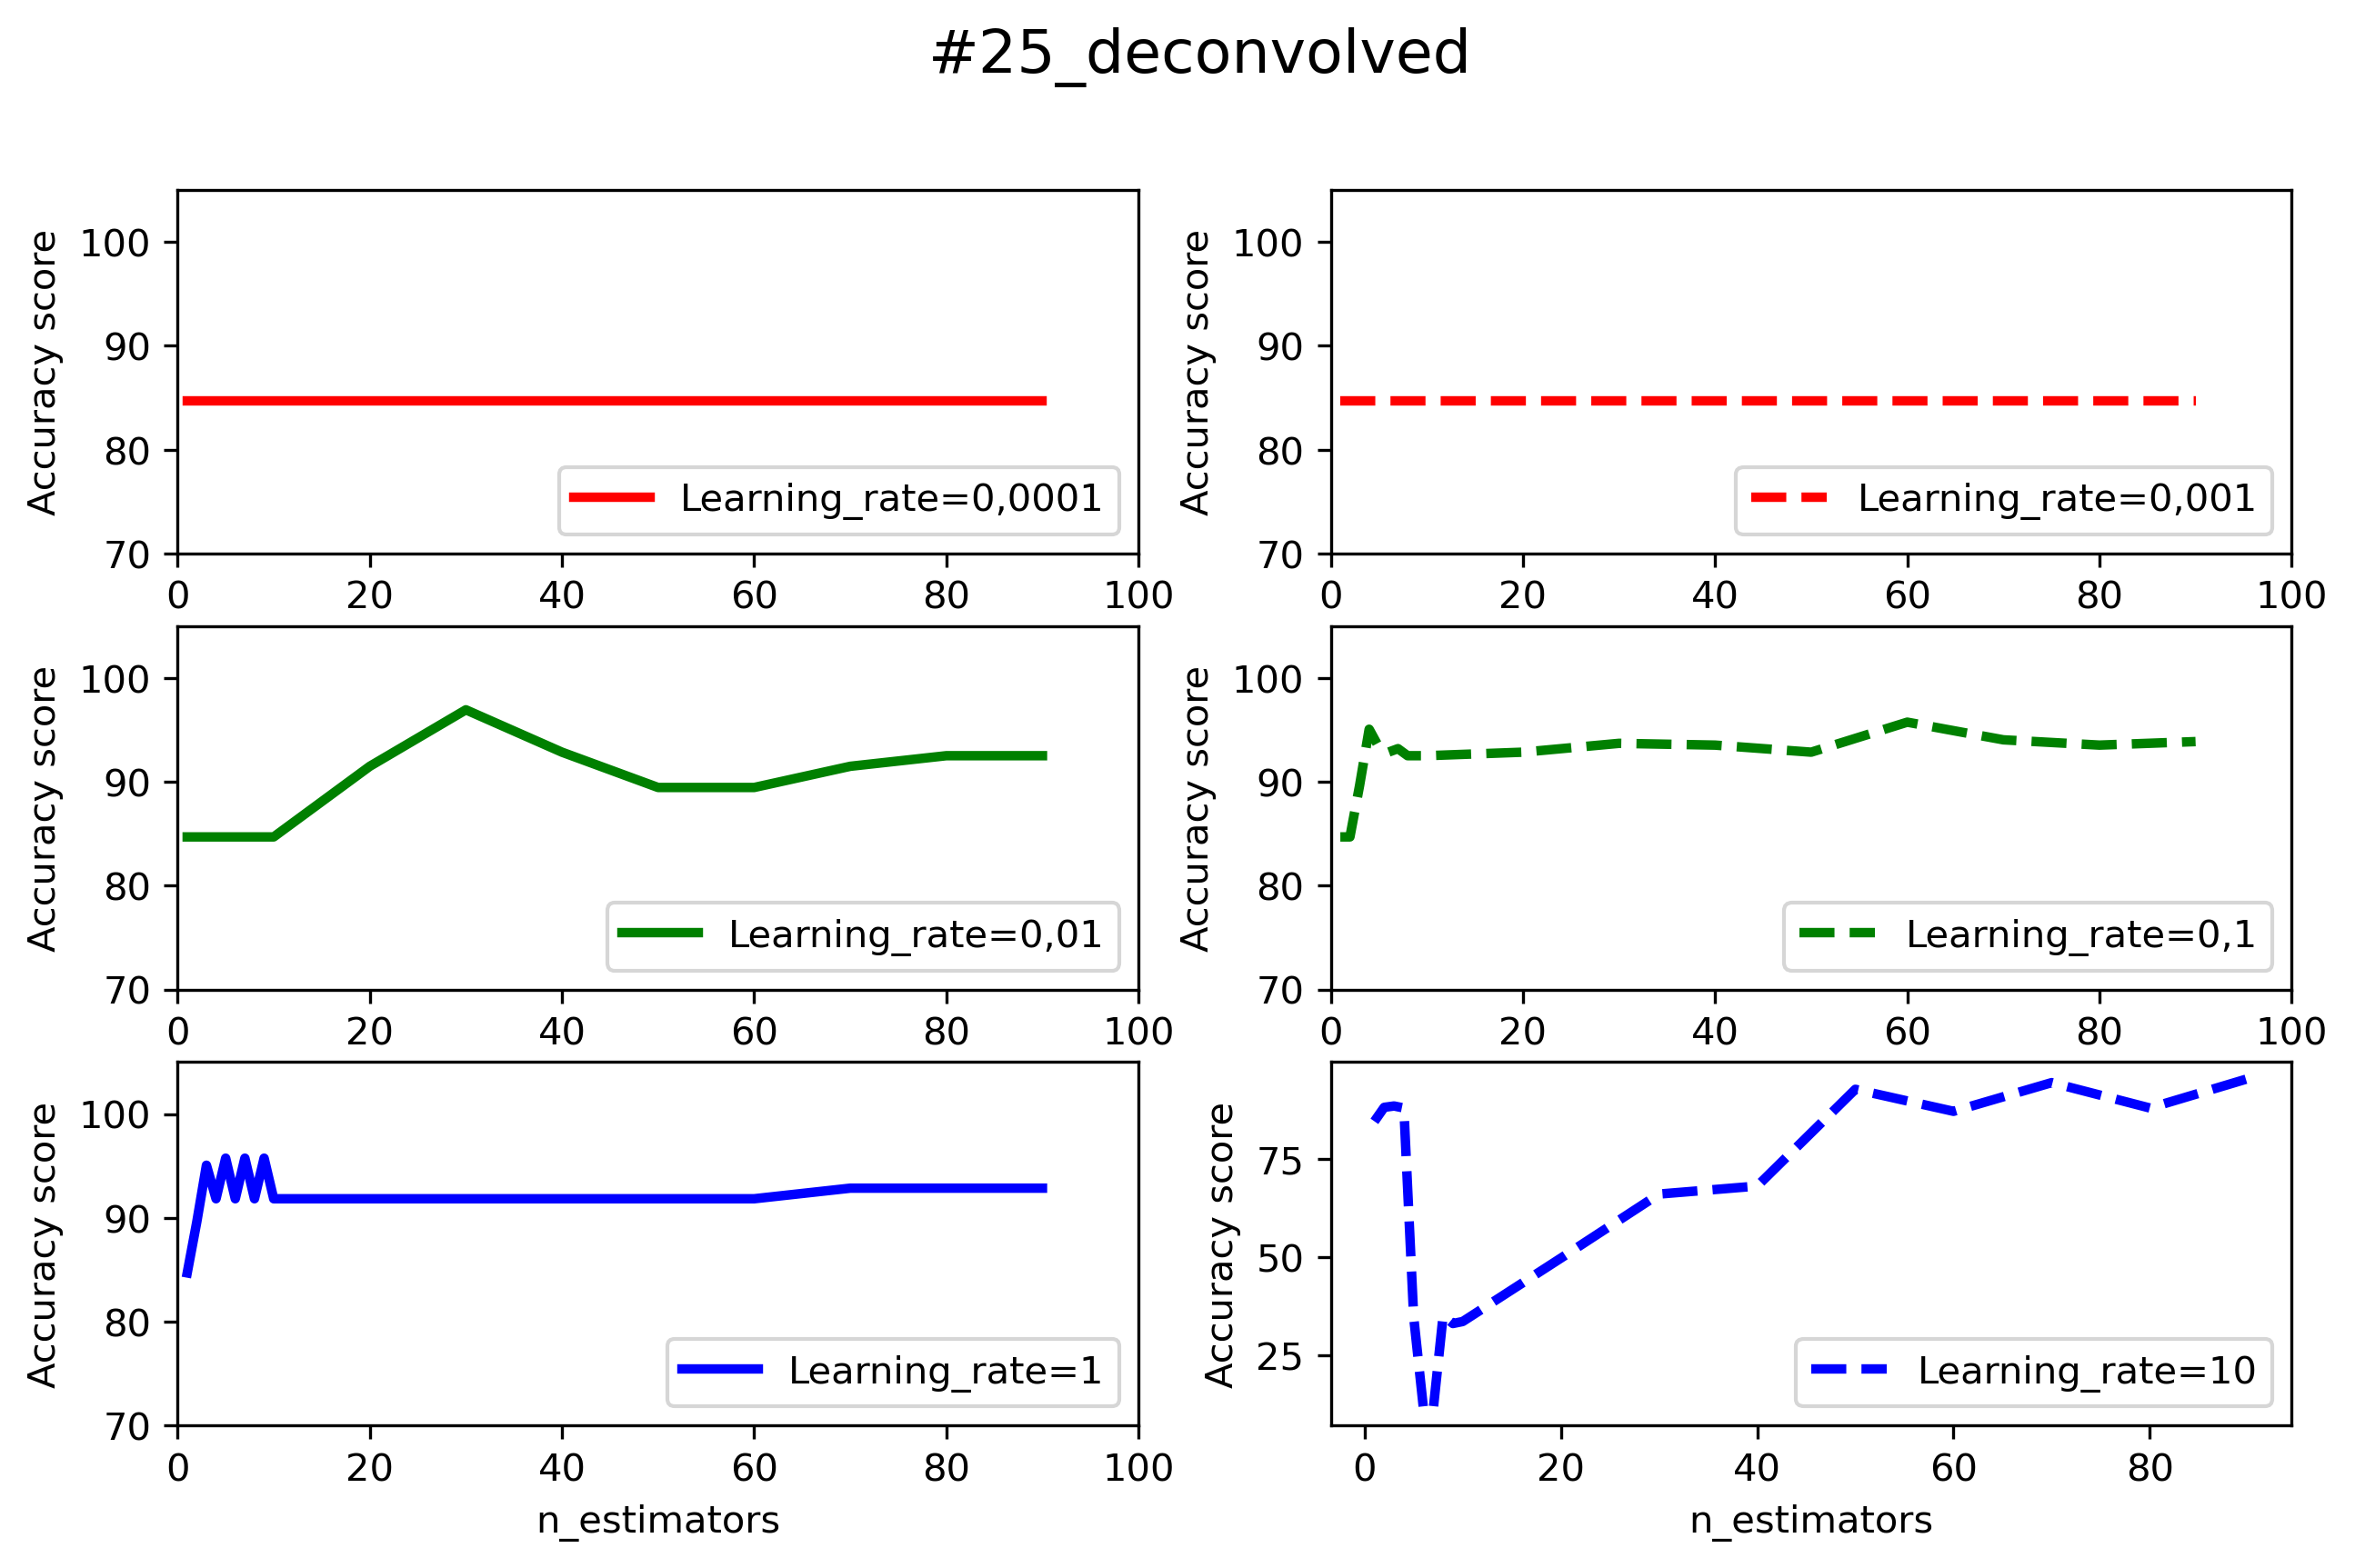

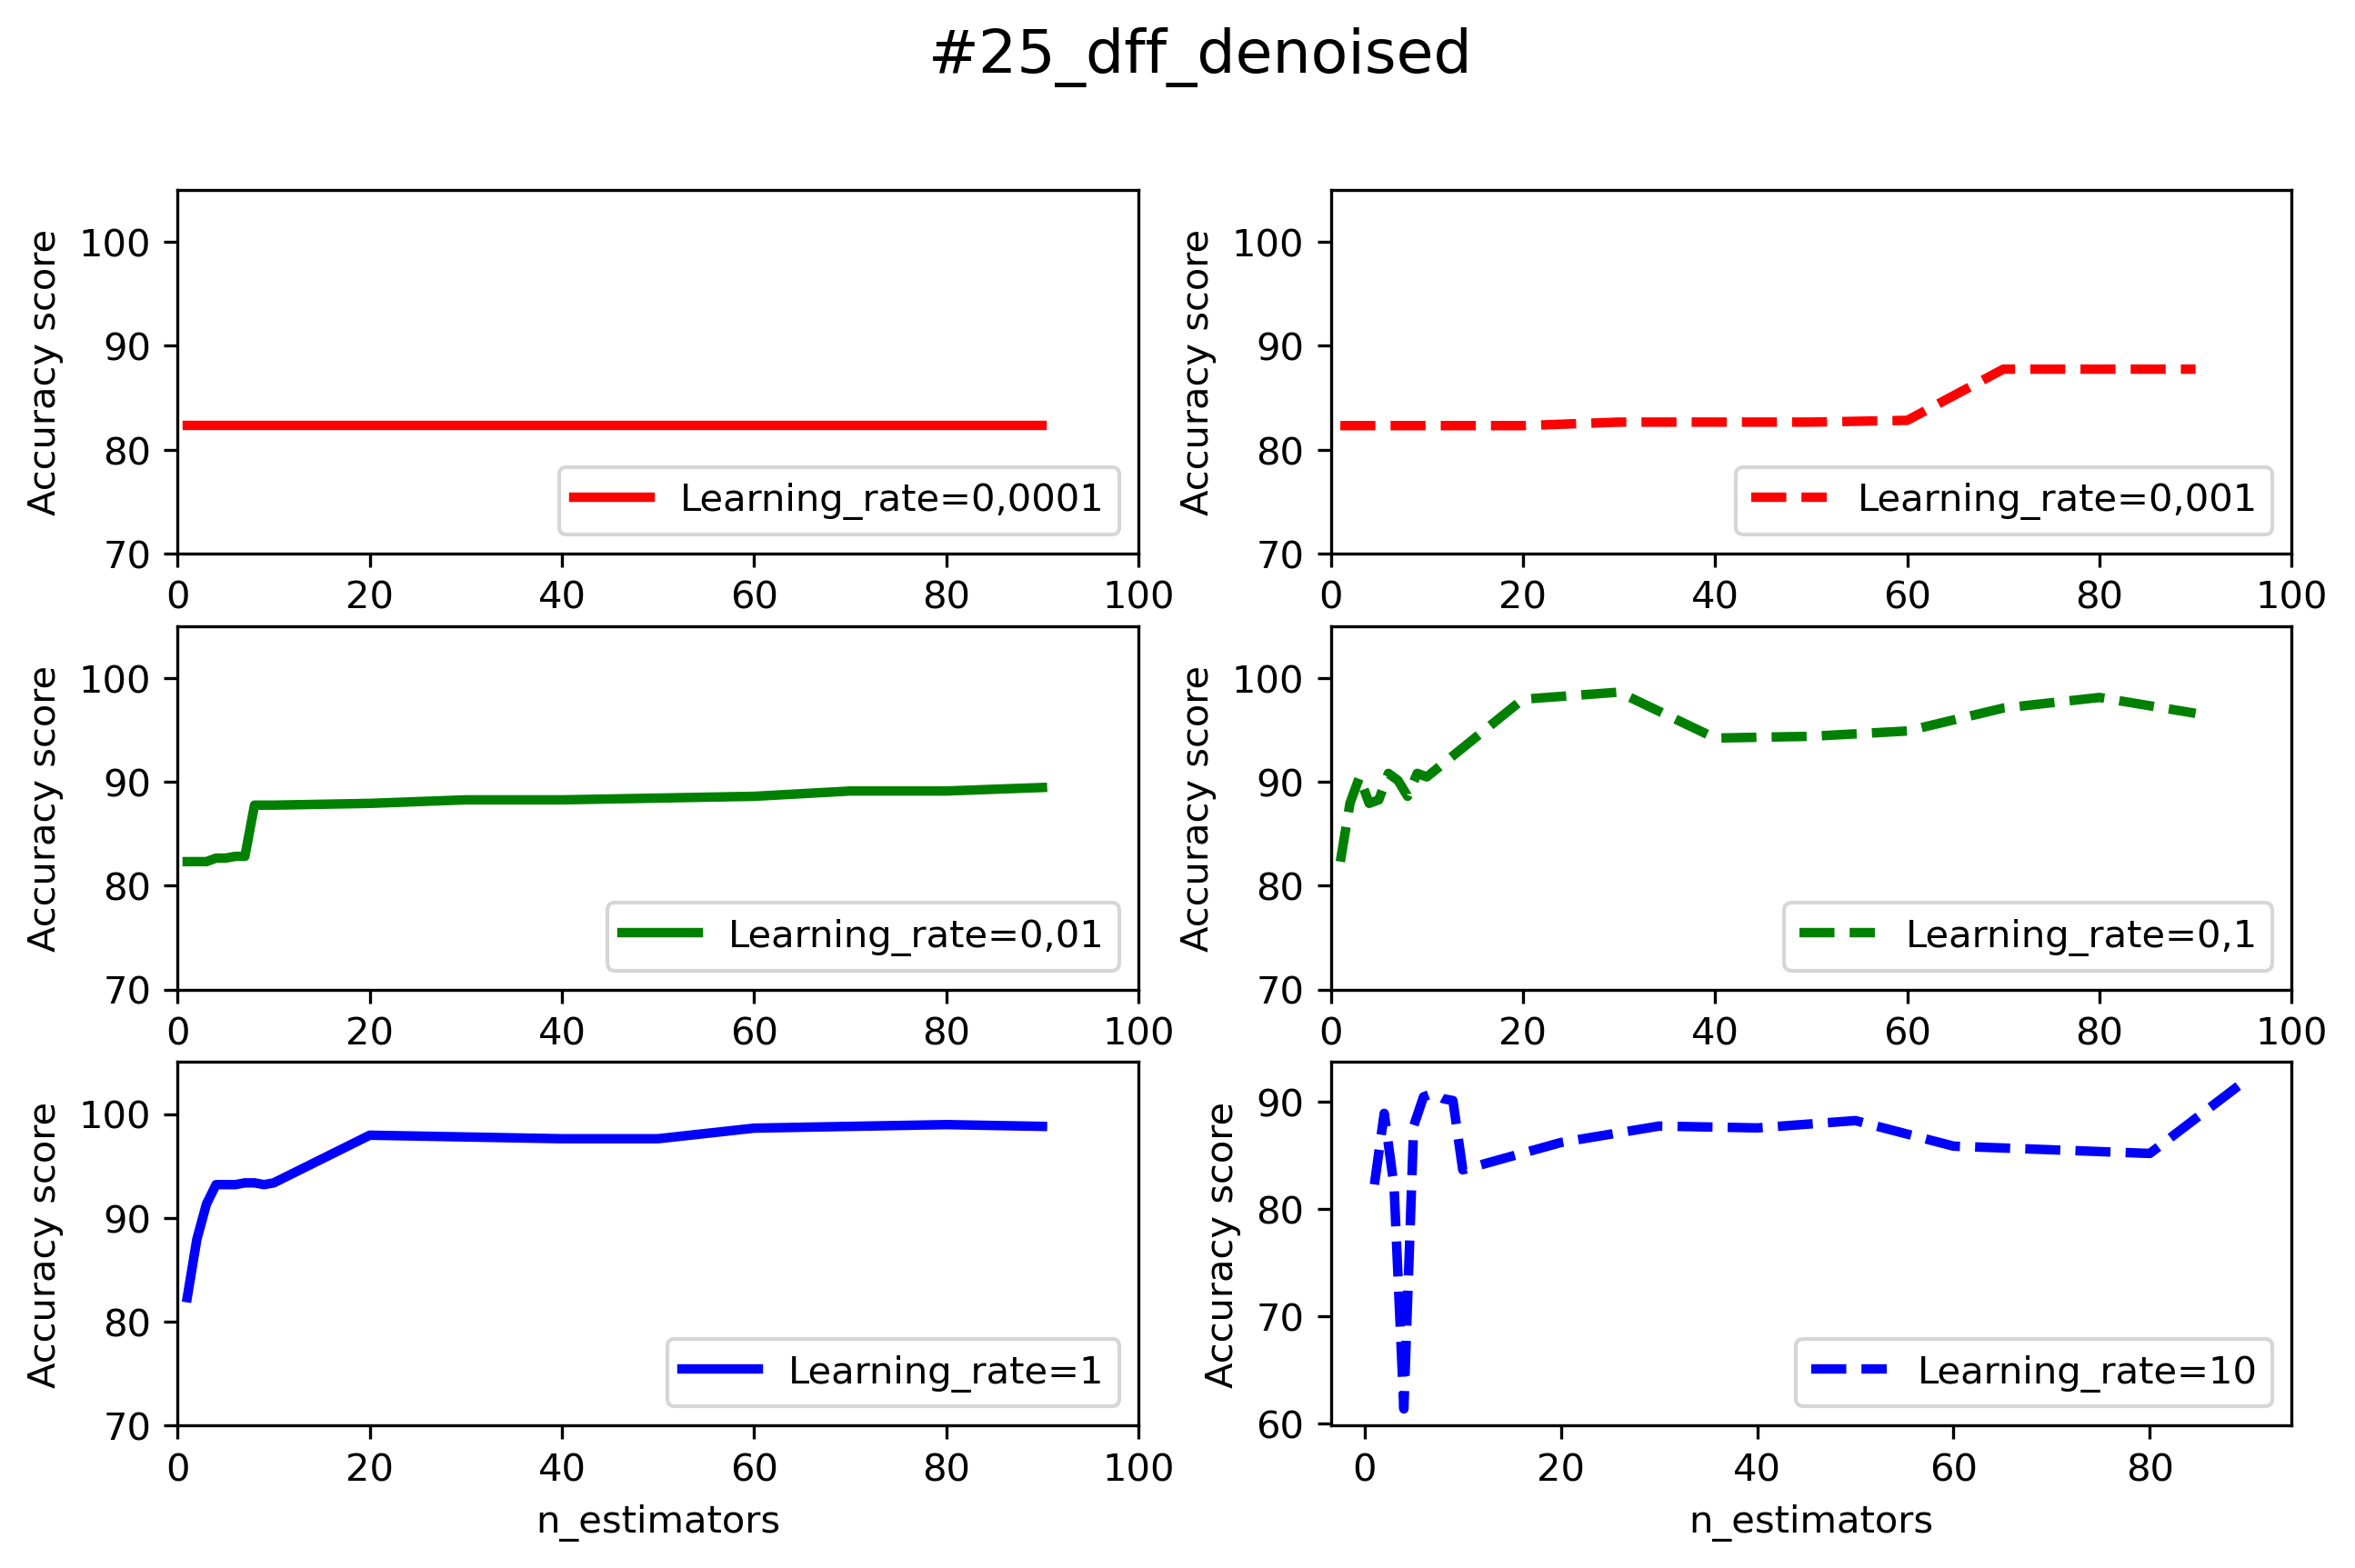

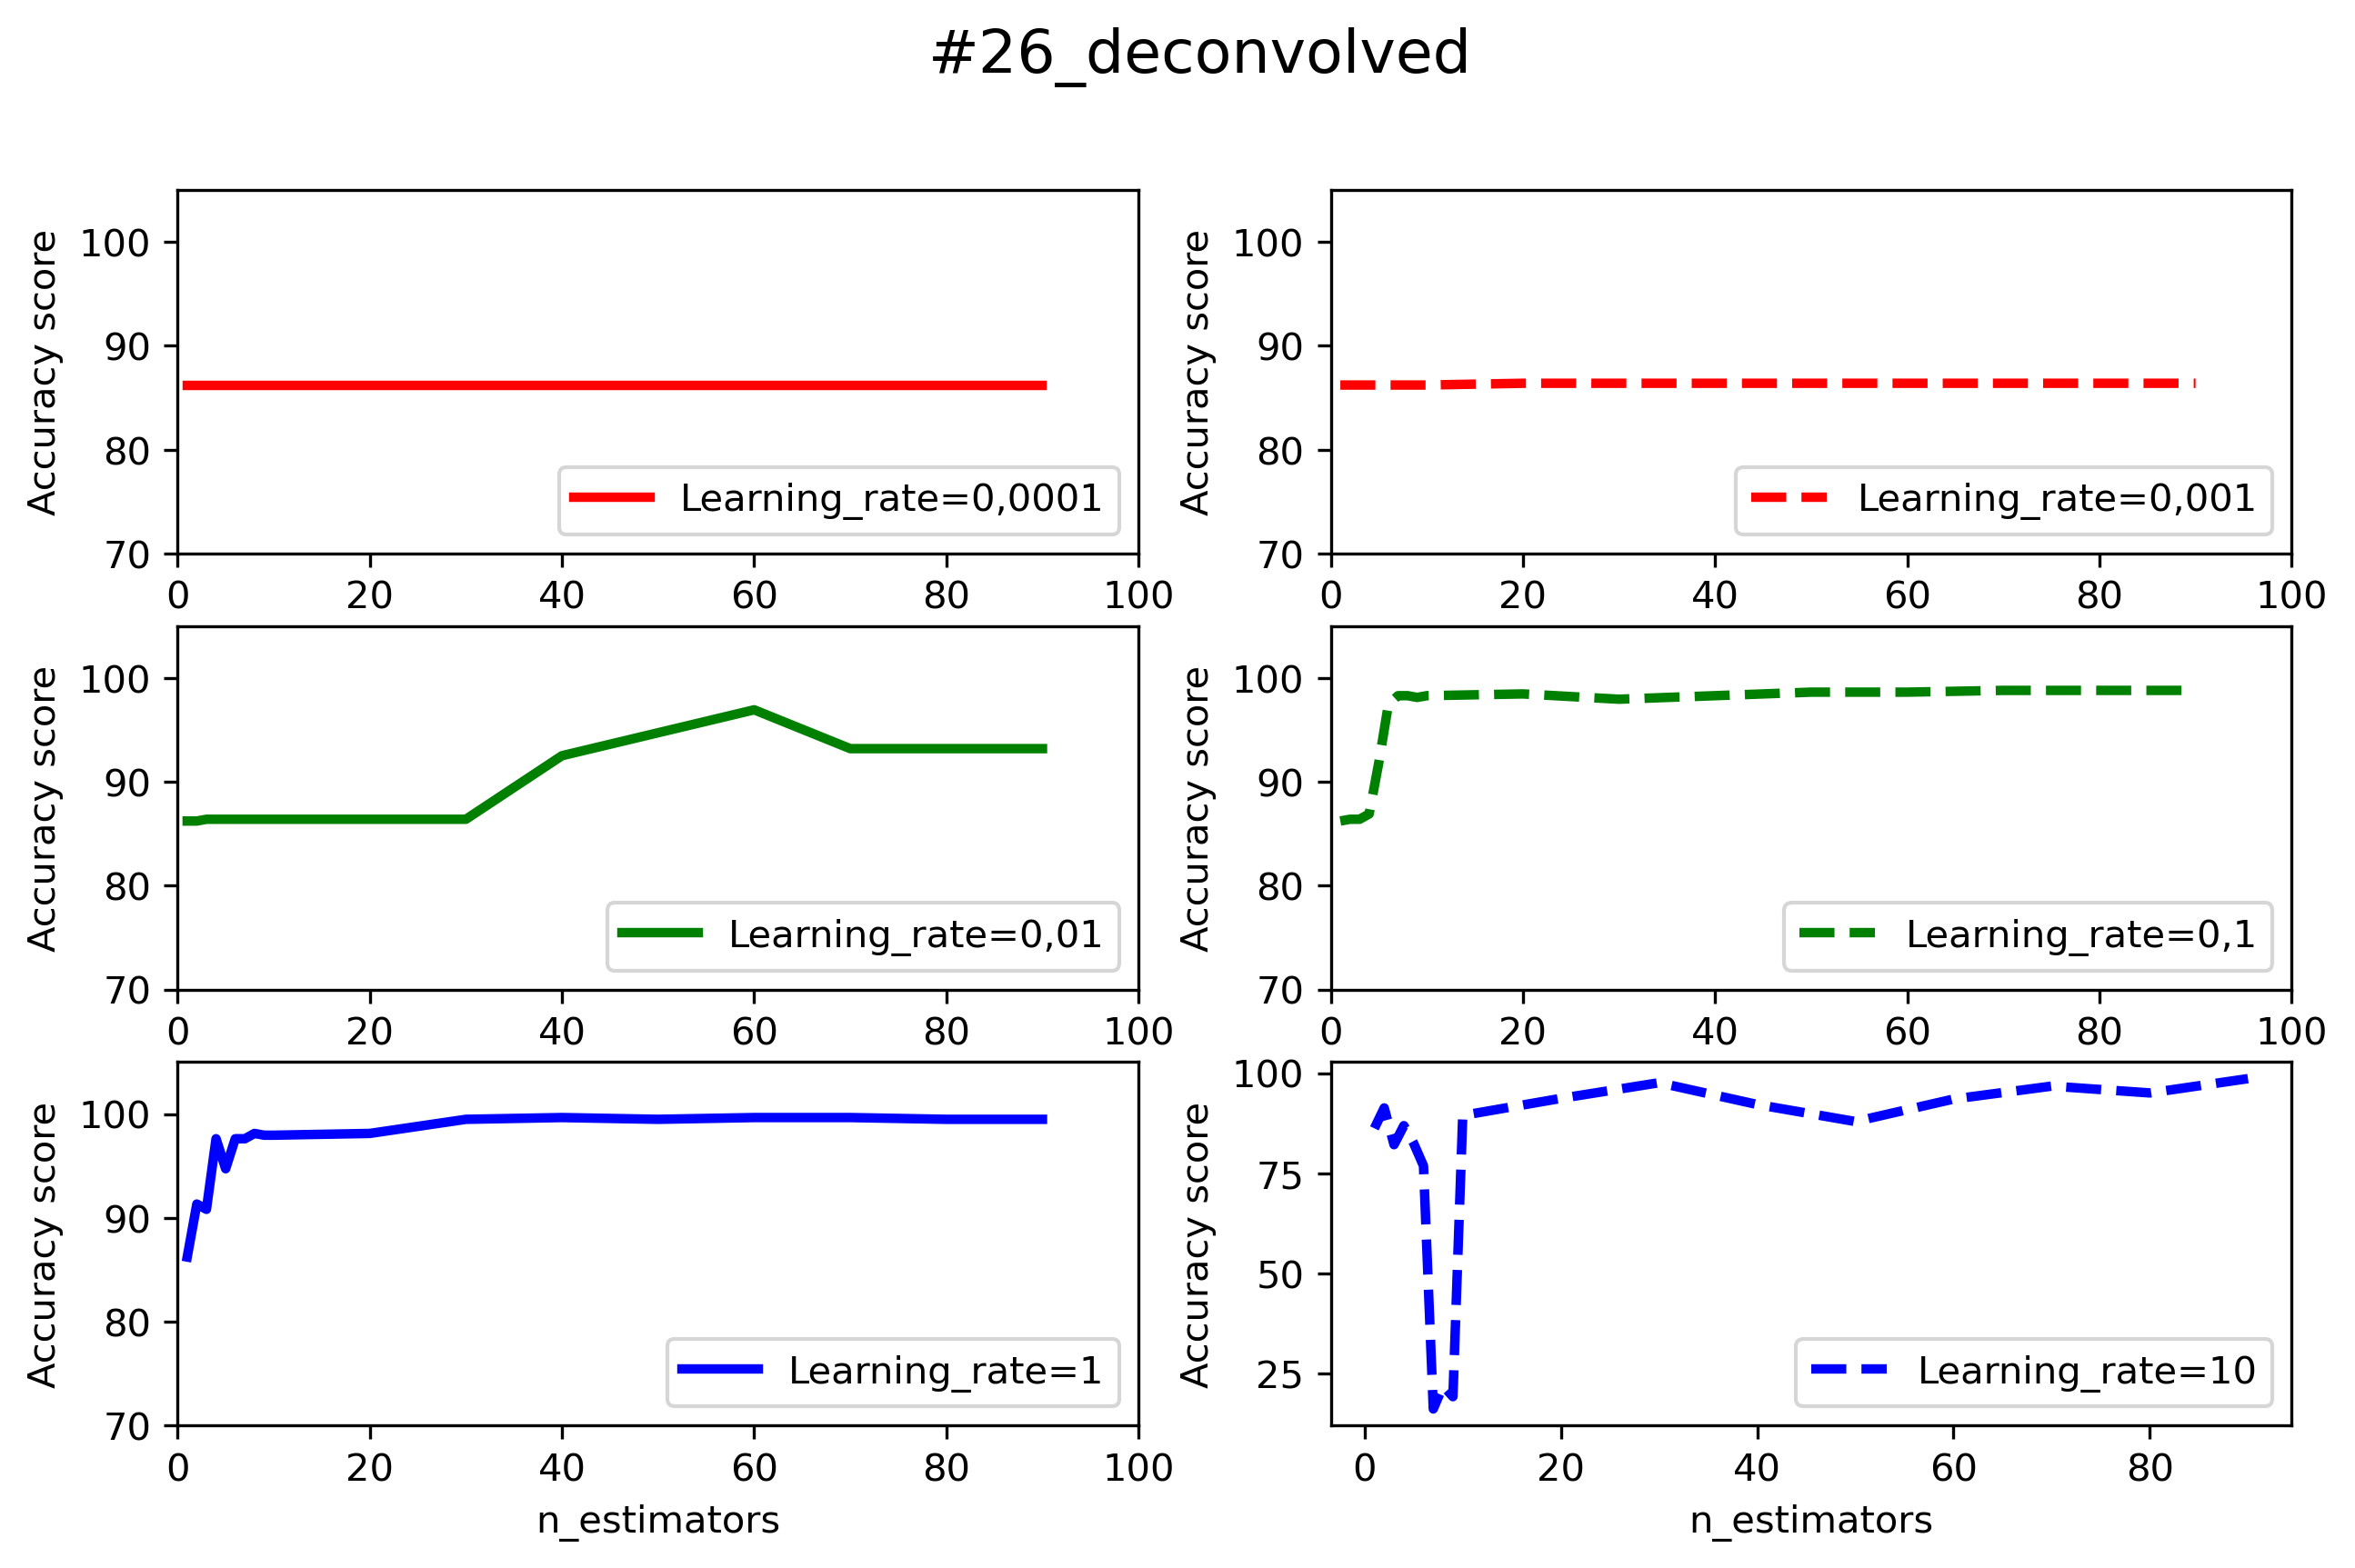

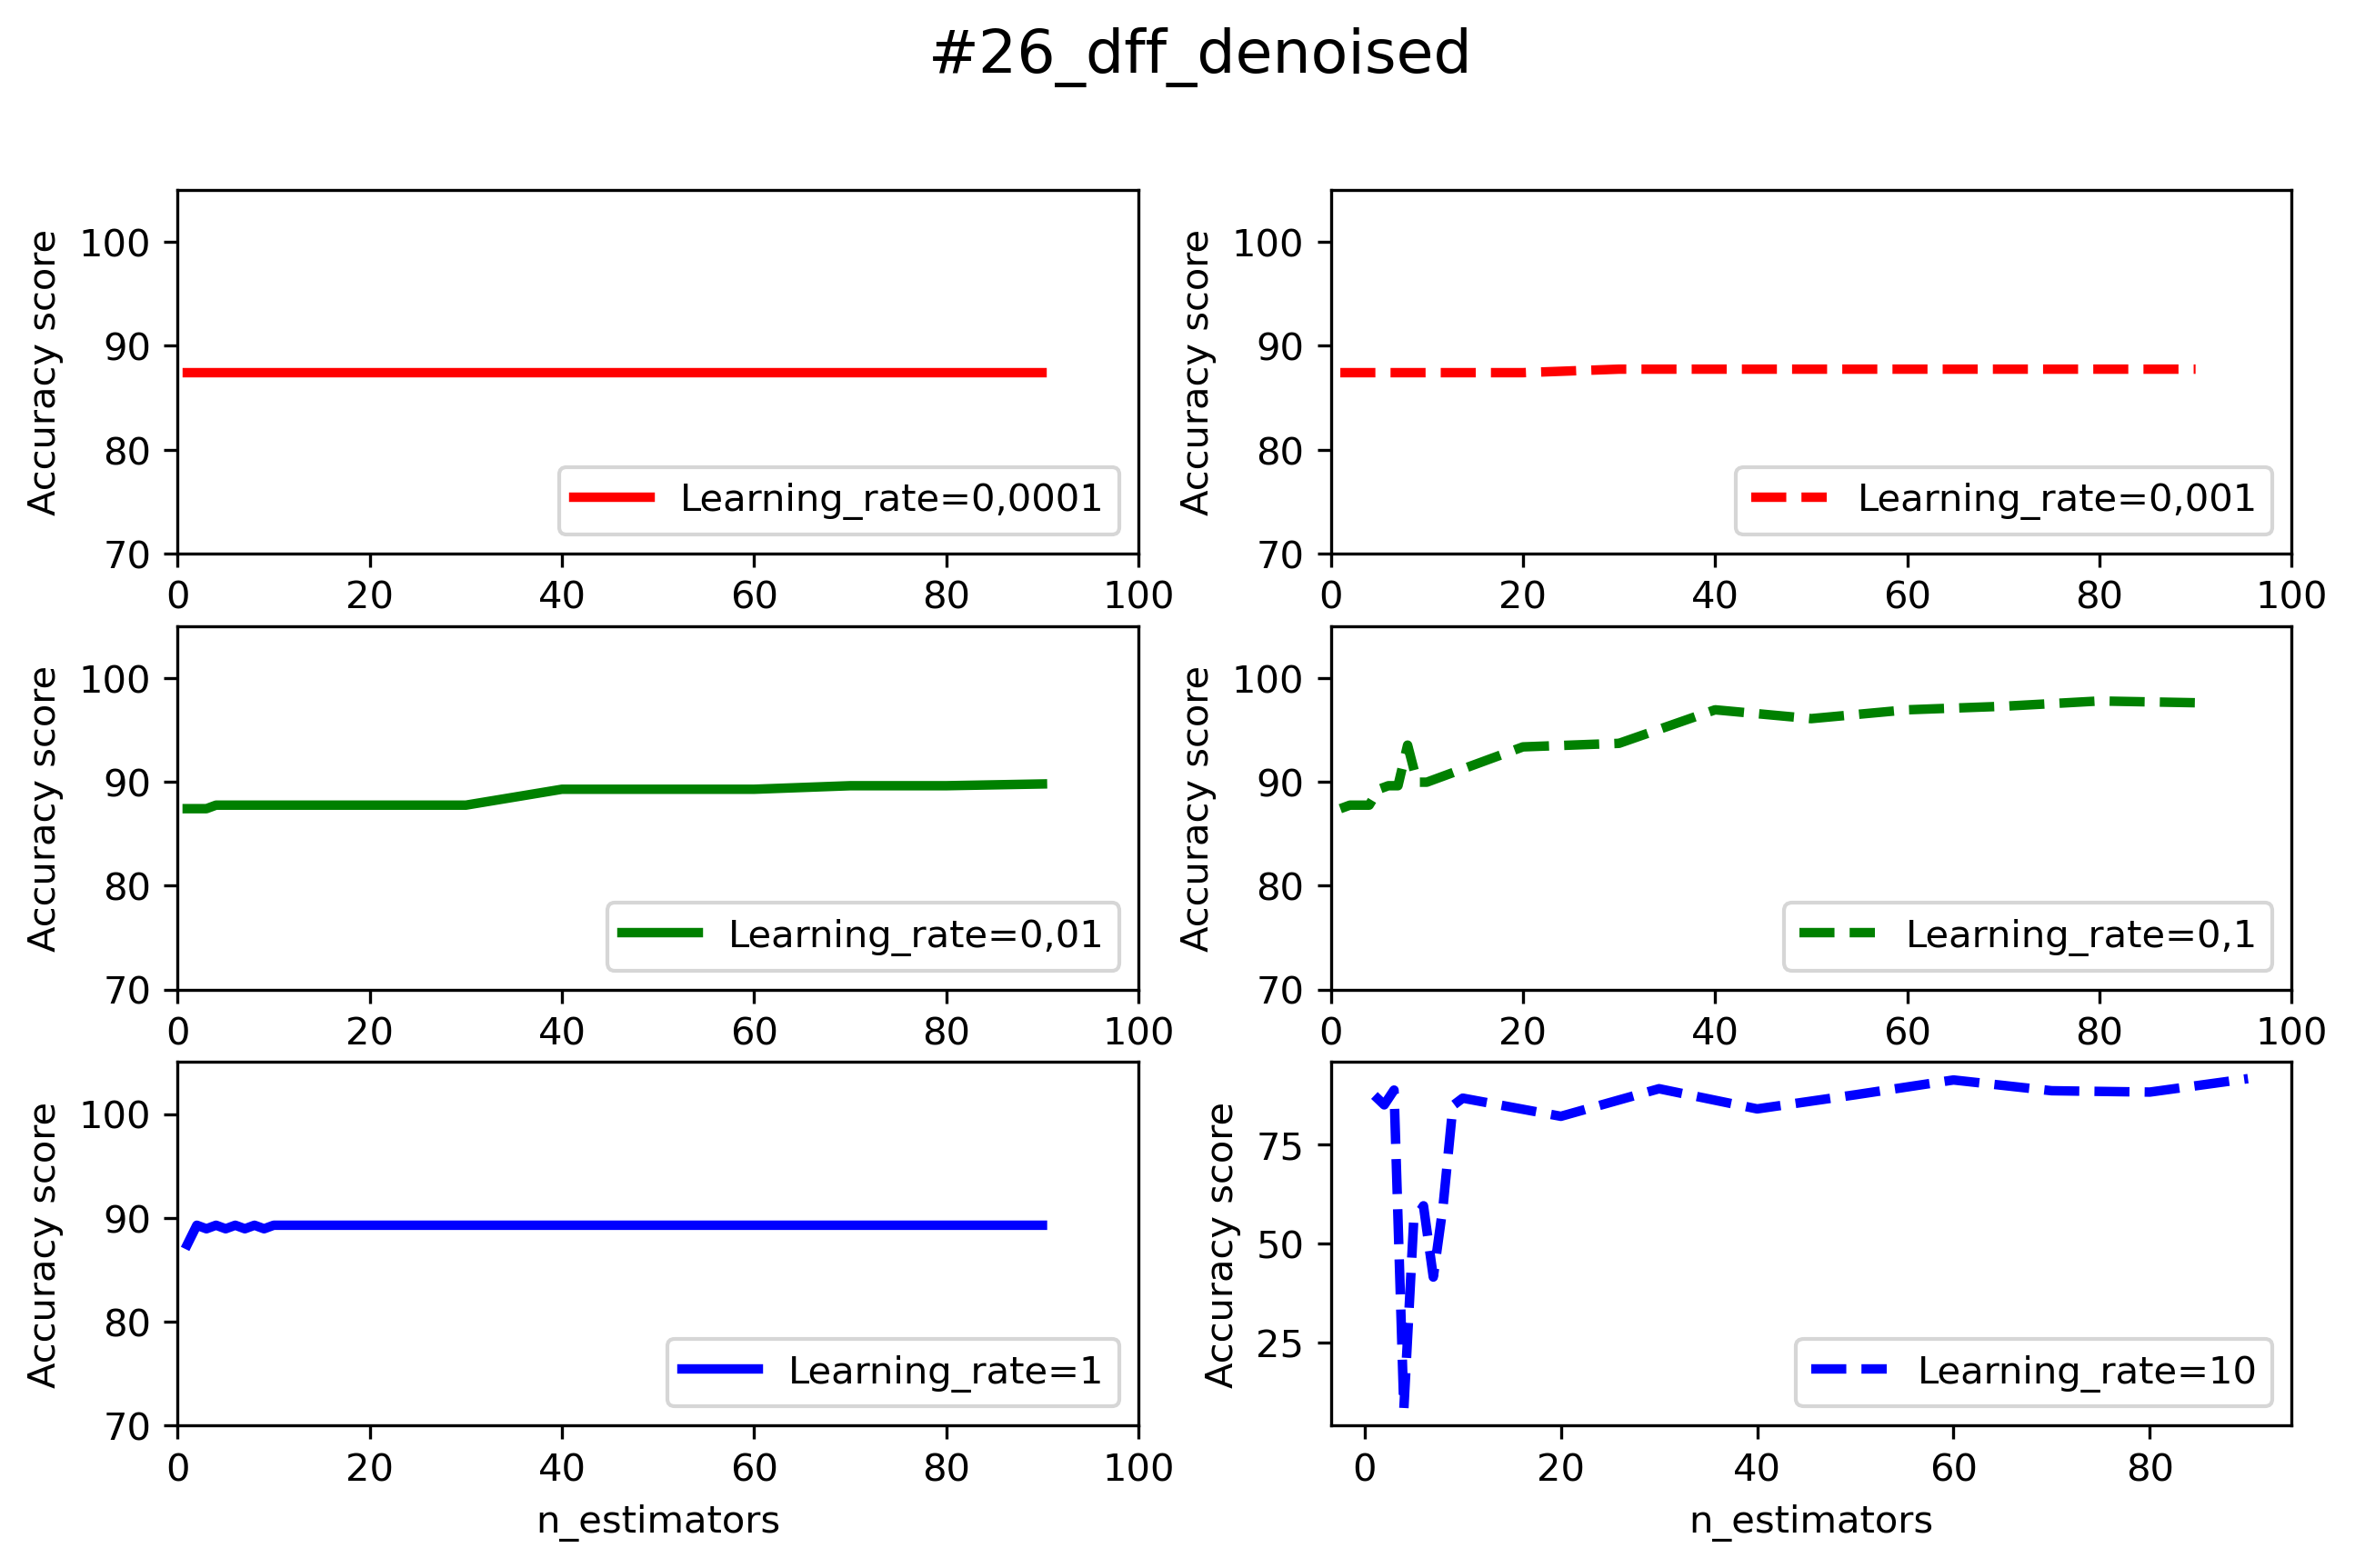

In [86]:
#figure_for_n_estimators_optimization
A11= list(np.array_split(Acc_score_11, 6))
A22= list(np.array_split(Acc_score_22, 6))
A33= list(np.array_split(Acc_score_33, 6))
A44= list(np.array_split(Acc_score_44, 6))
A55= list(np.array_split(Acc_score_55, 6))
A66= list(np.array_split(Acc_score_66, 6))
labels = ["Learning_rate=0,0001", "Learning_rate=0,001", "Learning_rate=0,01", "Learning_rate=0,1", "Learning_rate=1", "Learning_rate=10"]
colors = ["r","r","g", "g","b","b"]
linestyle= ["-", "--", "-", "--", "-", "--"]
Splits = [321, 322, 323, 324, 325, 326]
fig = plt.figure(figsize=(10, 6), dpi=300)
for i in range(321,327):
    plt.xlim([0, 100])
    plt.ylim([70, 105])
    plt.subplot(i)
    plt.plot(N, A11[i-321], color=colors[i-321],  linewidth=2.5, linestyle=linestyle[i-321], label=labels[i-321])
    plt.legend(loc="lower right")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy score")
fig.suptitle('#24_deconvolved', fontsize=16)
plt.show()

fig = plt.figure(figsize=(10, 6), dpi=300)
for i in range(321,327):
    plt.xlim([0, 100])
    plt.ylim([70, 105])
    plt.subplot(i)
    plt.plot(N, A22[i-321], color=colors[i-321],  linewidth=2.5, linestyle=linestyle[i-321], label=labels[i-321])
    plt.legend(loc="lower right")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy score")
fig.suptitle('#24_dff_denoised', fontsize=16)
plt.show()

fig = plt.figure(figsize=(10, 6), dpi=300)
for i in range(321,327):
    plt.xlim([0, 100])
    plt.ylim([70, 105])
    plt.subplot(i)
    plt.plot(N, A33[i-321], color=colors[i-321],  linewidth=2.5, linestyle=linestyle[i-321], label=labels[i-321])
    plt.legend(loc="lower right")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy score")
fig.suptitle('#25_deconvolved', fontsize=16)
plt.show()

fig = plt.figure(figsize=(10, 6), dpi=300)
for i in range(321,327):
    plt.xlim([0, 100])
    plt.ylim([70, 105])
    plt.subplot(i)
    plt.plot(N, A44[i-321], color=colors[i-321],  linewidth=2.5, linestyle=linestyle[i-321], label=labels[i-321])
    plt.legend(loc="lower right")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy score")
fig.suptitle('#25_dff_denoised', fontsize=16)
plt.show()

fig = plt.figure(figsize=(10, 6), dpi=300)
for i in range(321,327):
    plt.xlim([0, 100])
    plt.ylim([70, 105])
    plt.subplot(i)
    plt.plot(N, A55[i-321], color=colors[i-321],  linewidth=2.5, linestyle=linestyle[i-321], label=labels[i-321])
    plt.legend(loc="lower right")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy score")
fig.suptitle('#26_deconvolved', fontsize=16)
plt.show()

fig = plt.figure(figsize=(10, 6), dpi=300)
for i in range(321,327):
    plt.xlim([0, 100])
    plt.ylim([70, 105])
    plt.subplot(i)
    plt.plot(N, A66[i-321], color=colors[i-321],  linewidth=2.5, linestyle=linestyle[i-321], label=labels[i-321])
    plt.legend(loc="lower right")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy score")
fig.suptitle('#26_dff_denoised', fontsize=16)
plt.show()

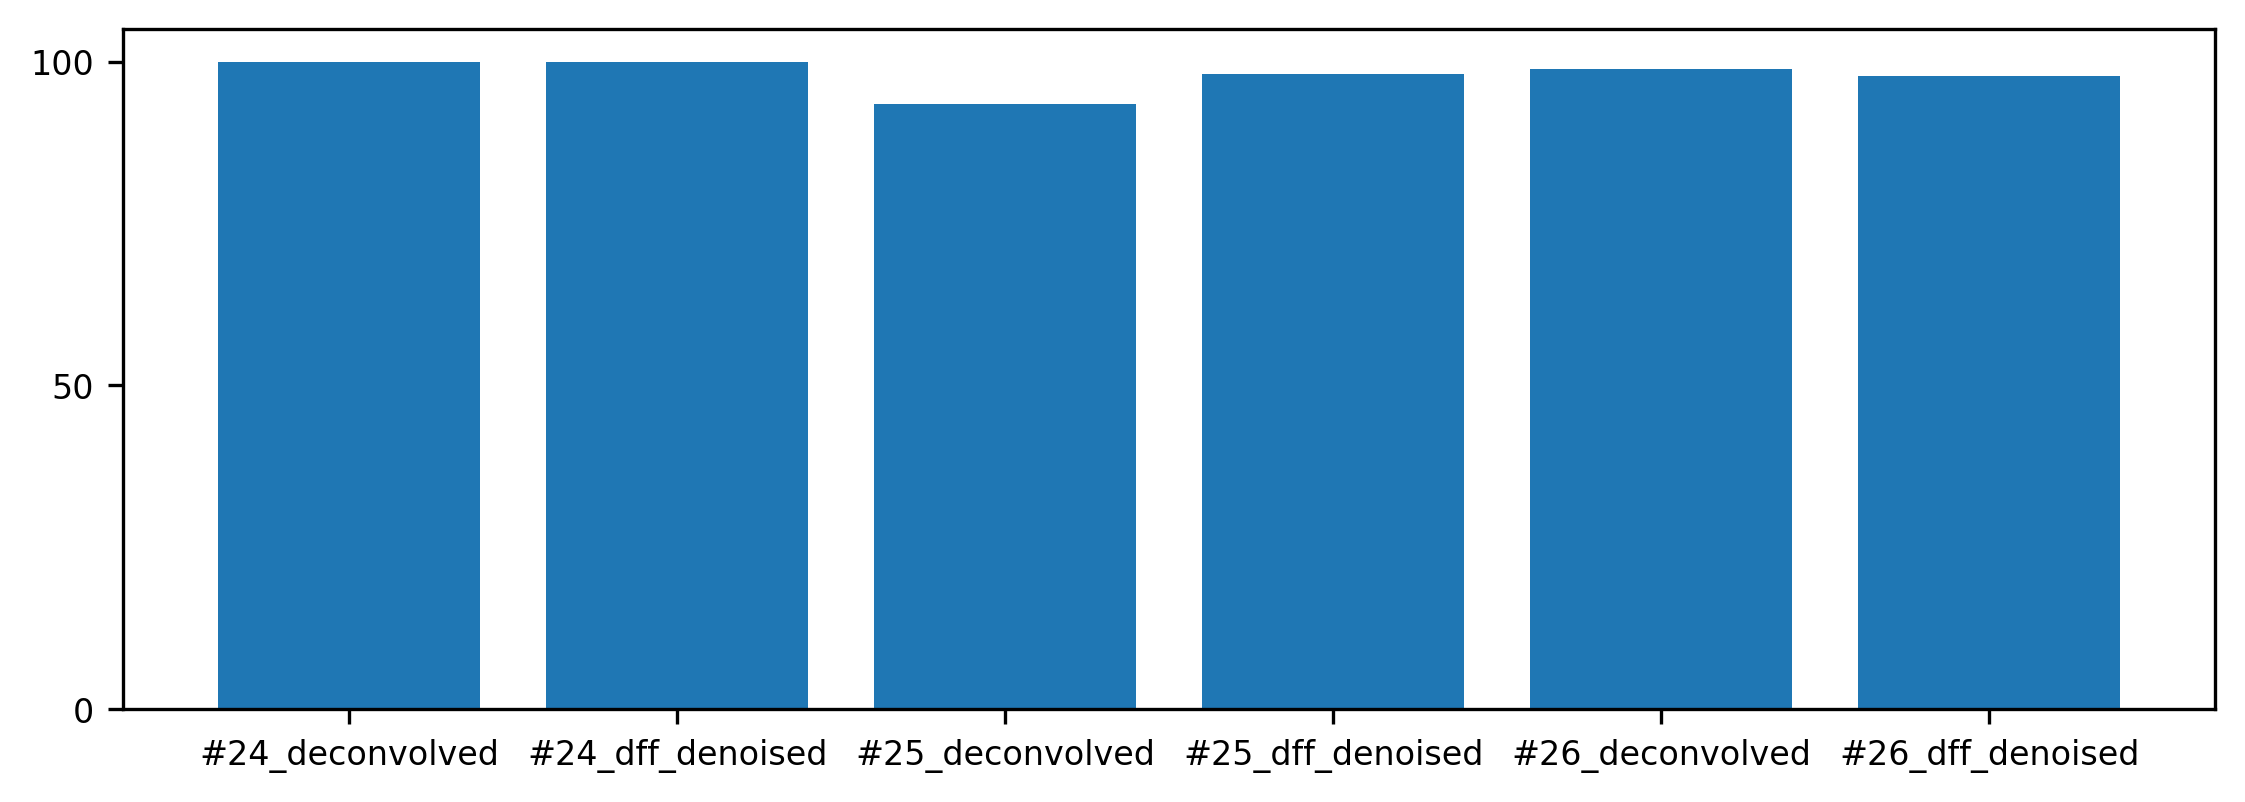

In [115]:
fig = plt.figure(figsize=(9, 3), dpi=300)
AC_80_01= [Acc_score_11[70], Acc_score_22[70],Acc_score_33[70],Acc_score_44[70],Acc_score_55[70],Acc_score_66[70]]
names= ['#24_deconvolved', '#24_dff_denoised', '#25_deconvolved', '#25_dff_denoised','#26_deconvolved', '#26_dff_denoised']
plt.bar(names, AC_80_01)
plt.rcParams['font.size'] = '20'
plt.show()